##### NAVSTAT feature (Navigational status)

Different navigational statuses, a categorical feature!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2


In [2]:
train_df = pd.read_csv("../data/original_data/ais_train.csv", sep="|")

Unique values: [ 0  1  5 15  3  2  8 12 13  4  6 14 11  7  9]
Unique value count: 15


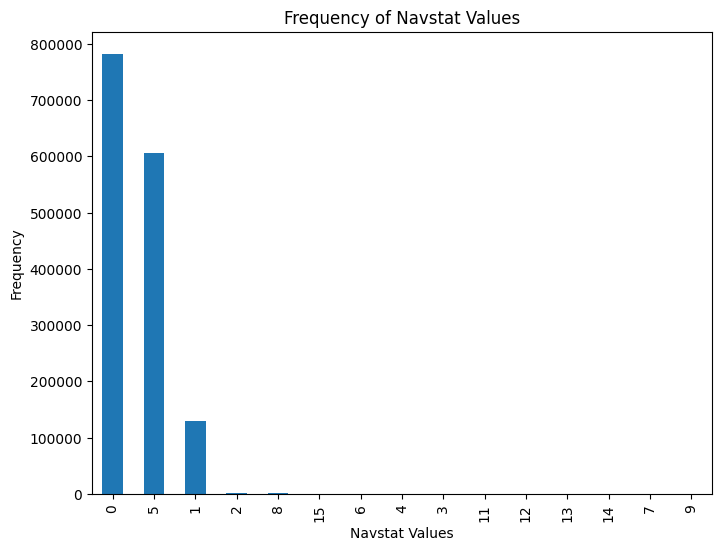

In [4]:
unique_navstats = train_df["navstat"].unique()

print(f"Unique values: {unique_navstats}")
print(f"Unique value count: {len(unique_navstats)}")

navstat_counts = train_df['navstat'].value_counts()


# Plot the barplot
plt.figure(figsize=(8, 6))
navstat_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Navstat Values')
plt.ylabel('Frequency')
plt.title('Frequency of Navstat Values')

# Show the plot
plt.show()

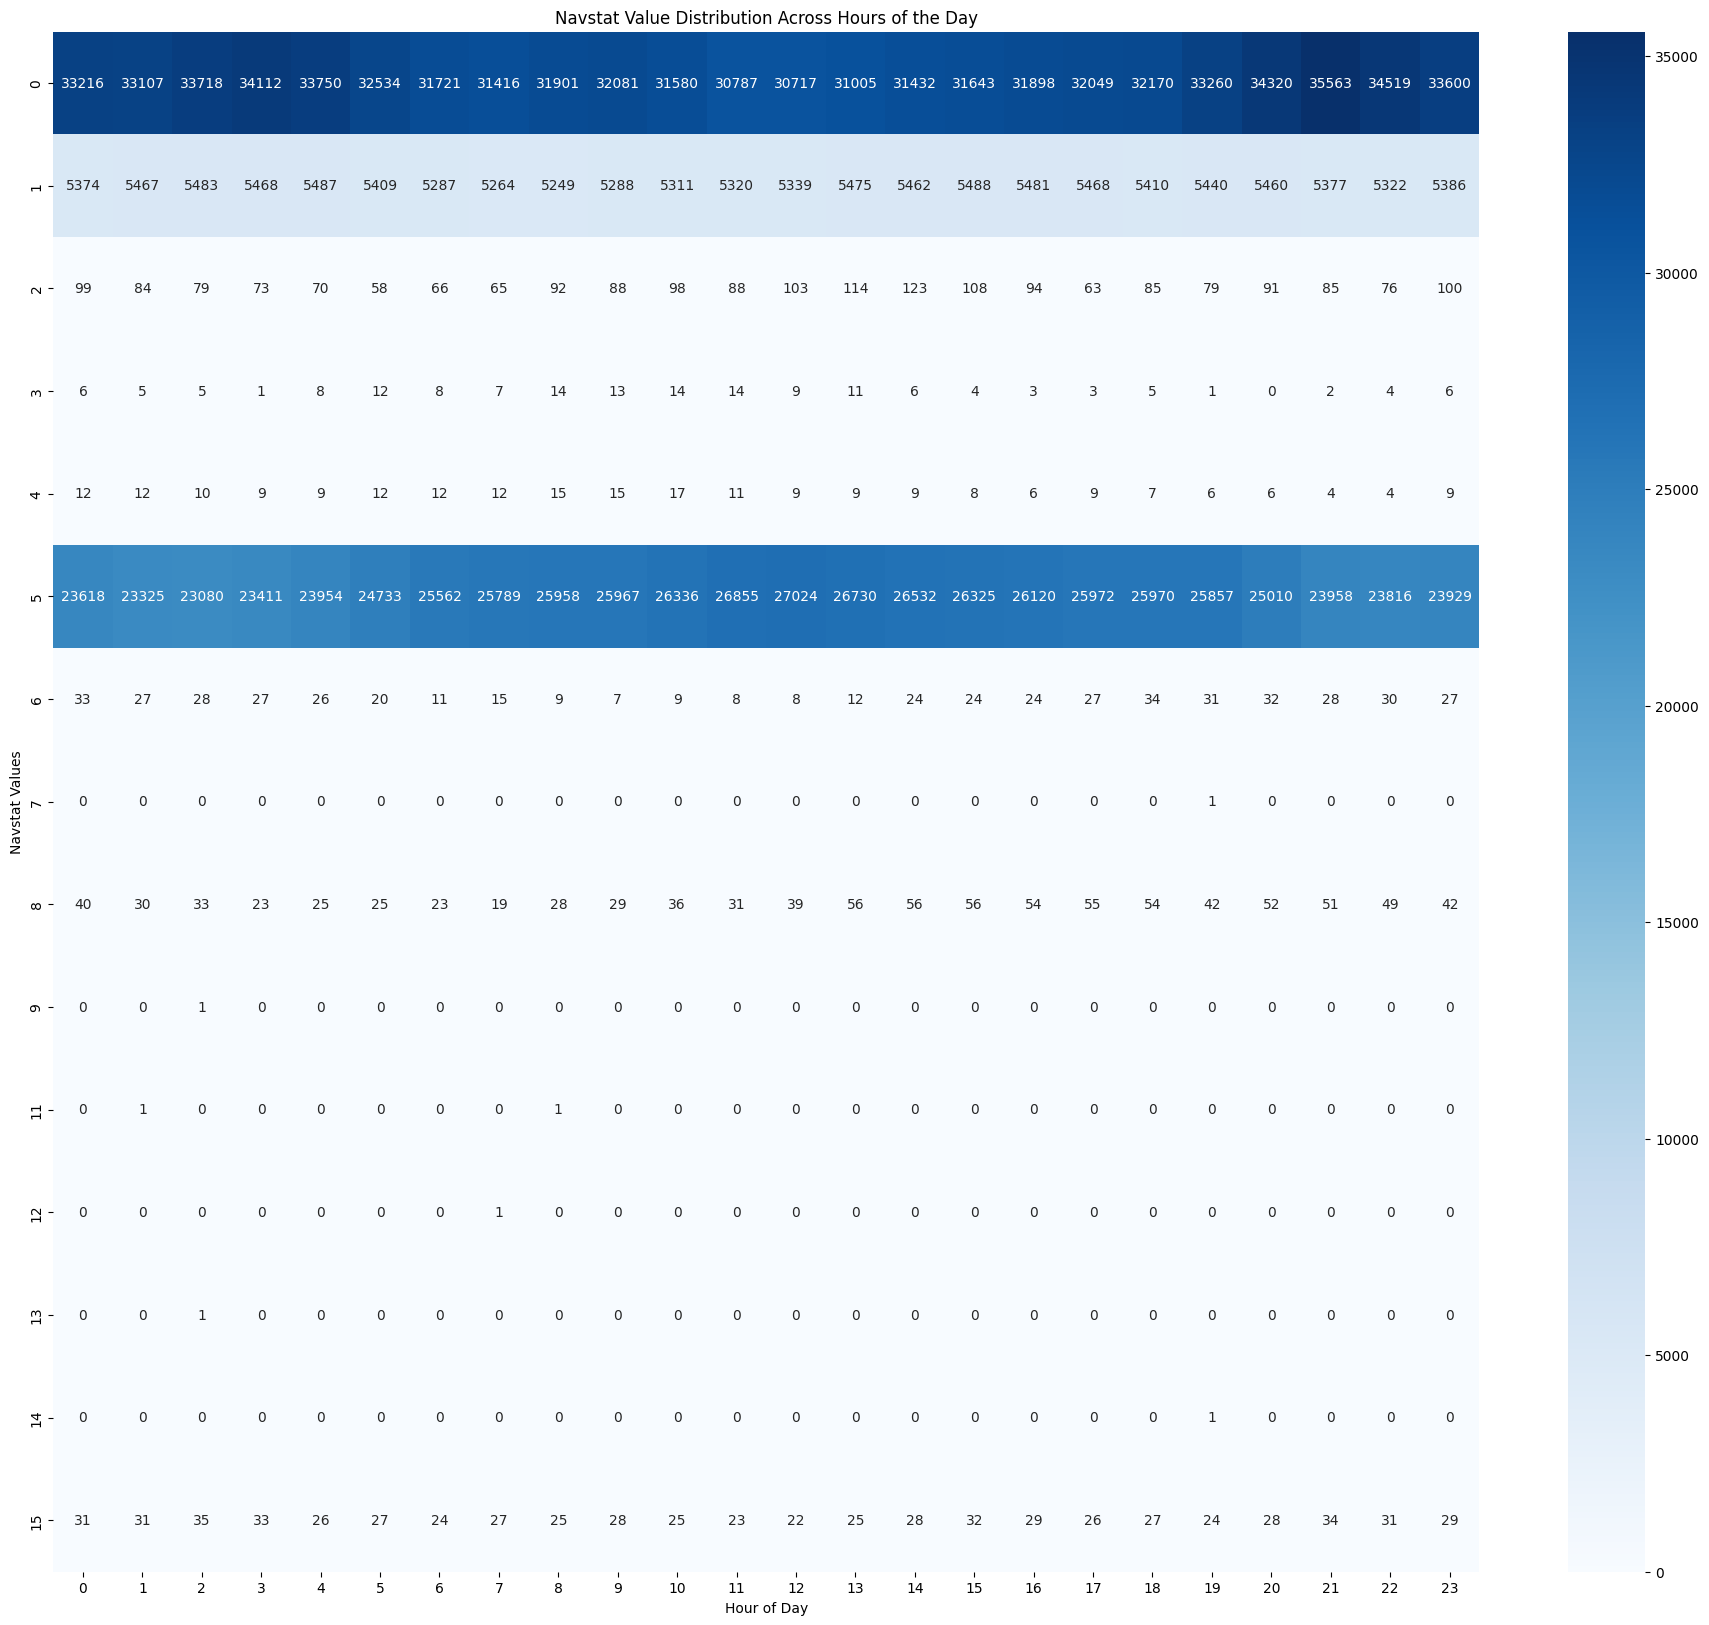

Correlation matrix:
               navstat  hour_of_day
navstat      1.000000     0.004459
hour_of_day  0.004459     1.000000


In [6]:
# Check whether there is some correlation between navstat value and time

train_df_copy = pd.DataFrame(train_df)

train_df_copy['time_converted'] = pd.to_datetime(train_df_copy['time'], errors='coerce')

# Step 2: Extract the hour of the day from the 'time_converted' column
train_df_copy['hour_of_day'] = train_df_copy['time_converted'].dt.hour

# Step 3: Group by 'navstat' and 'hour_of_day' to see frequency distribution
navstat_time_distribution = train_df_copy.groupby(['navstat', 'hour_of_day']).size().unstack(fill_value=0)

# Step 4: Plot the distribution of navstat values over the hours of the day
plt.figure(figsize=(23, 20))
sns.heatmap(navstat_time_distribution, cmap="Blues", annot=True, fmt="d")

# Add labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Navstat Values')
plt.title('Navstat Value Distribution Across Hours of the Day')

plt.show()

# Optional: Correlation between navstat and hour of day using a statistical method
correlation = train_df_copy[['navstat', 'hour_of_day']].corr(method='pearson')
print("Correlation matrix:\n", correlation)